In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_excel('/content/drive/My Drive/Forecasting model/COVID_case_report_final.xlsx')

data

,City,Total Laboratory-confirmed case,difference to the previous day,hospitalized,Deceased,Recover-A,current cases-B,Reported the last 7 days,Rhineland-Palatinate,+USAFD,<20 years,20-59 years-E,≥ 60 years,Date
0,Ahrweiler,5627,9,213.0,58,5071,498,36,27.6,27.6,57.1,24.7,16.3,2021-10-01
1,Altenkirchen,5749,4,458.0,105,5467,177,46,35.6,35.6,45.8,45.7,12.7,2021-10-01
2,Alzey-Worms,6064,13,365.0,127,5591,346,124,94.9,94.8,241.7,82.6,18.6,2021-10-01
3,Bad Dürkheim,5129,16,336.0,154,4588,387,63,47.4,47.4,64.8,59.1,20.5,2021-10-01
4,Bad Kreuznach,7047,19,183.0,143,6237,667,95,59.8,59.8,120.4,57.8,27.9,2021-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16303,KS Pirmasens,15661,14,581.0,116,15311,234,57,142.3,142.3,86.3,112.7,213.6,2023-01-13 00:00:00
16304,KS Speyer,23002,11,515.0,130,22541,331,61,120.6,120.6,65.9,140.1,120.5,2023-01-13 00:00:00
16305,KS Trier,43350,42,392.0,73,42705,572,83,75.1,75.0,27.3,76.7,103.5,2023-01-13 00:00:00
16306,KS Worms,37936,4,1169.0,175,37346,415,72,85.9,85.9,18.2,91.2,123.2,2023-01-13 00:00:00


In [ ]:
data.columns=['Location','TotalCase','Difference_to_the_previous_day','Hospitalized','Deceased','Recover','Current_Cases','Reported_last_7_days','Rhineland-Palatinate'
	,'+USAFD','<20 years','20-59 years','≥ 60 years','Date']

In [ ]:
data

,Location,TotalCase,Difference_to_the_previous_day,Hospitalized,Deceased,Recover,Current_Cases,Reported_last_7_days,Rhineland-Palatinate,+USAFD,<20 years,20-59 years,≥ 60 years,Date
0,Ahrweiler,5627,9,213.0,58,5071,498,36,27.6,27.6,57.1,24.7,16.3,2021-10-01
1,Altenkirchen,5749,4,458.0,105,5467,177,46,35.6,35.6,45.8,45.7,12.7,2021-10-01
2,Alzey-Worms,6064,13,365.0,127,5591,346,124,94.9,94.8,241.7,82.6,18.6,2021-10-01
3,Bad Dürkheim,5129,16,336.0,154,4588,387,63,47.4,47.4,64.8,59.1,20.5,2021-10-01
4,Bad Kreuznach,7047,19,183.0,143,6237,667,95,59.8,59.8,120.4,57.8,27.9,2021-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16303,KS Pirmasens,15661,14,581.0,116,15311,234,57,142.3,142.3,86.3,112.7,213.6,2023-01-13 00:00:00
16304,KS Speyer,23002,11,515.0,130,22541,331,61,120.6,120.6,65.9,140.1,120.5,2023-01-13 00:00:00
16305,KS Trier,43350,42,392.0,73,42705,572,83,75.1,75.0,27.3,76.7,103.5,2023-01-13 00:00:00
16306,KS Worms,37936,4,1169.0,175,37346,415,72,85.9,85.9,18.2,91.2,123.2,2023-01-13 00:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Remove duplicates
data.drop_duplicates(inplace=True)

# Remove rows with missing values
data.dropna(inplace=True)

# Convert data types
data['Date'] = pd.to_datetime(data['Date'])
data['TotalCase'] = data['TotalCase'].astype(float)

# Replace invalid values with NaN
data.replace('--*', np.nan, inplace=True)

# Drop irrelevant columns
data.drop(['Rhineland-Palatinate','+USAFD'], axis=1, inplace=True)

# Rename columns
data.columns = ['Location', 'Total', 'Diff_prev_day', 'Hospitalization', 'Deceased', 'Recovered', 'Current_cases','Reported_last_7_days', '<20_years', '20-59_years', '>=60_years','Date']

# Clean the Location column
data['Location'] = data['Location'].str.replace(' +', ' ',regex=True)
data['Location'] = data['Location'].str.strip()

# Convert to categorical variable
data['Location'] = data['Location'].astype('category')

# Use one-hot encoding to convert the location column to numerical variables
encoder = OneHotEncoder()
loc_encoded = encoder.fit_transform(data[['Location']])
location_data = pd.DataFrame(loc_encoded.toarray(), columns=encoder.get_feature_names_out(['Location']))

# Concatenate the original data with the one-hot encoded location data
data = pd.concat([data, location_data], axis=1)
data.drop(['Location'], axis=1, inplace=True)

# Set Date as the index
data.set_index('Date', inplace=True)

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
data = data.dropna()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
features = ['Diff_prev_day', 'Hospitalization', 'Deceased', 'Recovered', 'Current_cases','Reported_last_7_days', '<20_years', '20-59_years', '>=60_years']
target = 'Total'

# Split data into training and test sets
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize random forest model with default parameters
forest_model = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=42)

# Train model on training data
forest_model.fit(train_data, train_target)

# Make predictions on test data
predictions = forest_model.predict(test_data)

# Evaluate model performance
mse = mean_squared_error(test_target, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1077208.1412359853


In [ ]:
variance = np.var(test_target - predictions)
variance

1077122.6734781654

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(test_target,predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_target,predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'r squared: {r2}')


Mean Absolute Error: 728.5020217682752
Root Mean Squared Error: 1037.8863816603364
r squared: 0.9975080411457606


In the given case, the difference between the variance and MSE is very small, which suggests that the model is performing fairly well in terms of accuracy and consistency. However, we cannot conclude the model's performance solely based on these two metrics. We also need to consider other evaluation metrics and analyze the results in the context of the problem being solved.
Based on the metrics you provided, the model seems to perform well. The Mean Absolute Error (MAE) of 728.50 and Root Mean Squared Error (RMSE) of 1037.89 are relatively small compared to the mean of the target variable and indicate that the model's predictions are on average close to the actual values.

The R-squared value of 0.9975 indicates that the model explains a high proportion of the variance in the target variable and is a good fit for the data.

In [ ]:
data.describe()

,Total,Diff_prev_day,Hospitalization,Deceased,Recovered,Current_cases,Reported_last_7_days,<20_years,20-59_years,>=60_years,...,Location_Mayen-Koblenz,Location_Neuwied,Location_Rhein-Hunsrück,Location_Rhein-Lahn-Kreis,Location_Rhein-Pfalz-Kreis,Location_Südliche Weinstr.,Location_Südwestpfalz,Location_Trier-Saarburg,Location_Vulkaneifel,Location_Westerwaldkreis
count,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,...,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000
mean,22710.564244,96.353941,541.826311,143.424962,20769.197608,1797.941674,520.045078,549.493407,542.921202,255.063882,...,0.027783,0.027783,0.027783,0.027783,0.027783,0.027783,0.027783,0.027783,0.027783,0.027783
std,20758.229254,131.958319,354.026268,81.321293,20002.403493,2116.666405,624.477615,683.898319,553.805812,257.235221,...,0.164355,0.164355,0.164355,0.164355,0.164355,0.164355,0.164355,0.164355,0.164355,0.164355
min,869.000000,-1395.000000,38.000000,9.000000,853.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5925.000000,14.000000,288.000000,85.000000,5169.000000,377.000000,113.000000,111.400000,134.700000,64.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15232.000000,48.000000,439.000000,124.000000,12704.000000,1006.000000,284.000000,267.900000,323.100000,173.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34701.000000,125.000000,699.000000,192.000000,31949.000000,2380.000000,666.000000,669.900000,815.800000,368.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99217.000000,1393.000000,2281.000000,463.000000,97543.000000,15903.000000,5432.000000,5568.500000,4817.700000,2233.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


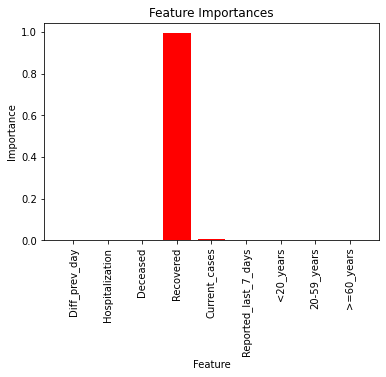

In [ ]:
import matplotlib.pyplot as plt
important_feature = forest_model.feature_importances_

# Plot feature importances
plt.bar(features, important_feature,color="Red")
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
output = pd.DataFrame({'Actual_value':test_target,'Predicted_value':predictions})
output

,Actual_value,Predicted_value
Date,,
2022-04-04,48279.0,44130.029799
2022-05-19,18688.0,18330.703025
2021-11-05,5128.0,5412.086953
2021-09-27,2153.0,2021.394592
2022-11-04,14130.0,15857.913350
...,...,...
2022-07-28,70600.0,67691.126543
2022-01-19,13886.0,13572.353768
2022-01-11,7177.0,7994.038416


This indicates a relatively large difference between the actual and predicted value.

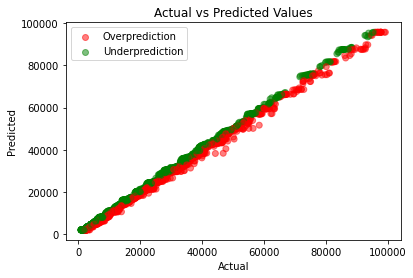

In [ ]:
new_color = output['Actual_value']-output['Predicted_value']
new_color2 = ['red' if x > 0 else 'green' for x in new_color]

plt.scatter(output['Actual_value'], output['Predicted_value'], c = new_color2, alpha = 0.5)
plt.scatter([],[], c='red', alpha=0.5, label='Overprediction')
plt.scatter([],[], c='green', alpha=0.5, label='Underprediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper left')
plt.show()

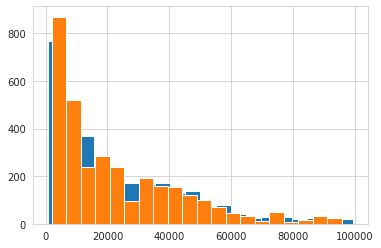

In [ ]:
import seaborn as sn
sn.set_style("whitegrid")
plt.hist(output["Actual_value"],bins=20)
plt.hist(output['Predicted_value'],bins=20)
plt.show()